In [4]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [21]:
df_KingCountry = pd.read_csv('kc_house_data.csv')
df_KingCountry

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [22]:
df_KingCountry.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
df_KingCountry.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [24]:
# Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop()
df_KingCountry.drop('id', axis=1, inplace=True)

# Use the method describe() to obtain a statistical summary of the data
df_KingCountry.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [29]:
# Use the method value_counts to count the number of houses with unique floor values
# Use the method to_frame() to convert it to a data frame
df_KingCountry.floors.value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


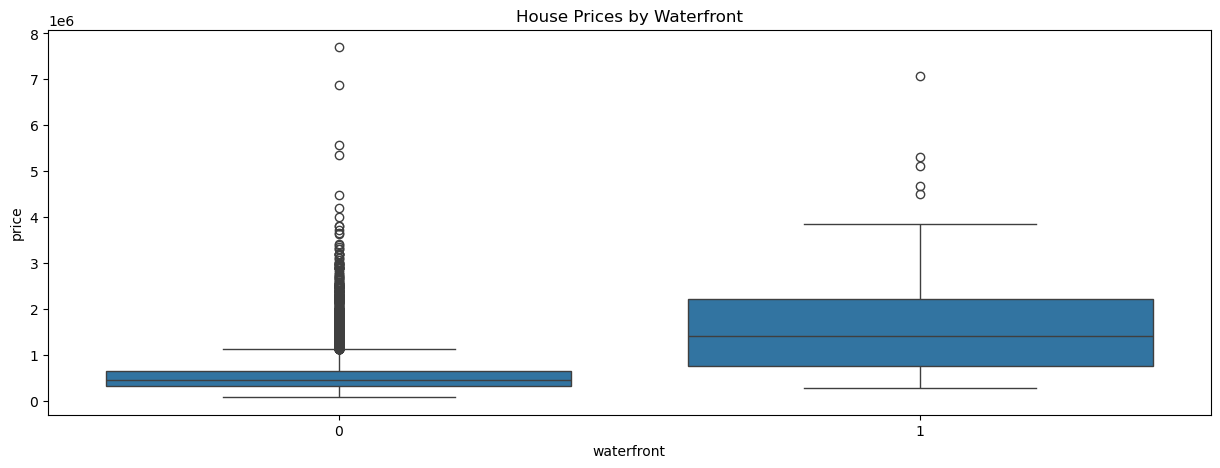

In [39]:
# Use the function boxplot in the seaborn library to produce a plot that can help determine whether houses with a waterfront view or without a waterfront view have more price outliers
plt.figure(figsize=(15,5))
sns.boxplot(x='waterfront', y='price', data=df_KingCountry)
plt.title('House Prices by Waterfront')
plt.show()

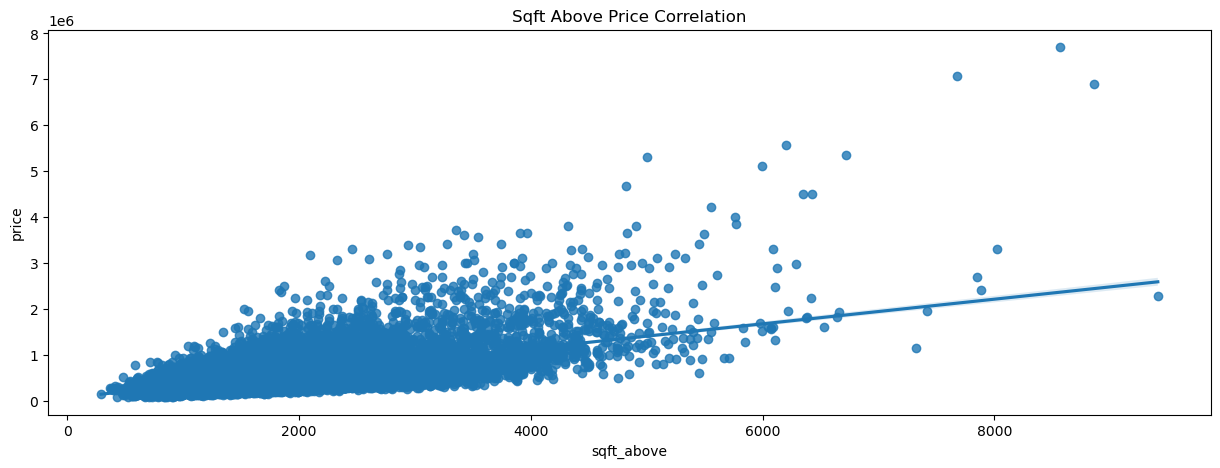

In [40]:
plt.figure(figsize=(15,5))
sns.regplot(x='sqft_above', y='price', data=df_KingCountry)
plt.title('Sqft Above Price Correlation')
plt.show()

In [41]:
# Fit a linear regression model to predict the price using the feature 'sqft_living', then calculate the R^2
X = np.array(df_KingCountry['sqft_living']).reshape((-1, 1))
y = np.array(df_KingCountry.price)

In [42]:
model = LinearRegression()

In [45]:
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
model.score(X,y)

0.4928532179037931

In [49]:
X = np.array(df_KingCountry[['sqft_living','floors','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','waterfront','lat']])
y = np.array(df_KingCountry.price)

In [50]:
lm = LinearRegression()

In [51]:
lm.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
lm.score(X,y)

0.6577151058279325

In [54]:
# Create a pipeline object that scales the data, performs a polynomial transform, and fits a linear regression model
X = np.array(df_KingCountry[['sqft_living','floors','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','waterfront','lat']])
y = np.array(df_KingCountry.price)
poly_features = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

In [55]:
mdl = LinearRegression()

In [58]:
mdl.fit(poly_features,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
mdl.score(poly_features,y)

0.7513467656307746

In [66]:
# Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1, and calculate the R^2 using the test data
X = np.array(df_KingCountry[['sqft_living','floors','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','waterfront','lat']])
y = np.array(df_KingCountry.price)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [67]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [68]:
RidgeModel.score(x_test, y_test)

0.6480374087702265

In [74]:
# Perform a second-order polynomial transform on both the training data and testing data
X = np.array(df_KingCountry[['sqft_living','floors','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','waterfront','lat']])
y = np.array(df_KingCountry.price)
poly_features = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=1)

In [75]:
RidgeModel1 = Ridge(alpha=0.1)
RidgeModel1.fit(x_train, y_train)

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [76]:
RidgeModel.score(x_train, y_train)

0.7297387081226516